<a href="https://colab.research.google.com/github/HOYALIM/DS3-Demo/blob/main/D03_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Notebook link: https://tinyurl.com/dsc140a-fa25-d03-nb

## Initialization

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

rng = np.random.default_rng(seed=13)

In [2]:
# Total number of samples in the dataset
N = 1000

## Generating Random Data

In [3]:
# Coefficients
w = np.array([-1, 2])

# Random numbers between [-5, 5]
x_data = rng.uniform(low=-5, high=5, size=N)
# x_data.sort()

# Corresponding y values
y_perfect = w[0] + w[1] * x_data

# Adding noise
epsilon = rng.normal(0, 2, size=y_perfect.shape)
y_data = y_perfect + epsilon

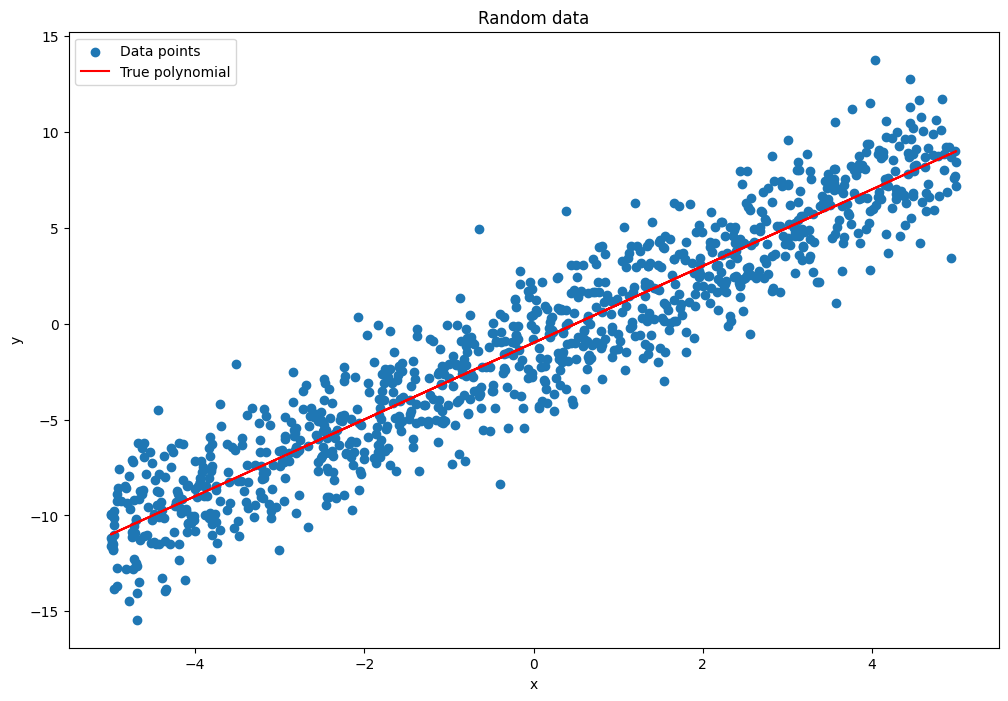

In [4]:
plt.figure(figsize=(12, 8))
plt.scatter(x_data, y_data, label="Data points")
plt.plot(x_data, y_perfect, color="red", label="True polynomial")
plt.legend()
plt.title("Random data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Metric

$$
\begin{aligned}
MSE &= \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 \\
R^2 &= 1 - \frac{\sum ( y_{i} - \hat{y}_{i} )^2}{\sum (y_i - \bar{y})^2}
\end{aligned}
$$

$R^2$ statistic represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model.

In [5]:
def mean_squared_error(y_true: np.ndarray, y_pred: np.ndarray) -> np.number:
    return np.mean((y_true - y_pred) ** 2)

# def r2_score(y_true: np.ndarray, y_pred: np.ndarray) -> np.number:
#     return 1 - ((np.sum((y_true - y_pred)**2)) / (np.sum((y_true - np.mean(y_true))**2 )))

## Split Train/Test data

In [6]:
def train_test_split(x, y, test_fraction=0.2):
    indices = np.arange(len(x))
    rng.shuffle(indices)

    test_size = round(len(x) * test_fraction)

    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    x_train, y_train = x[train_indices], y[train_indices]
    x_test, y_test = x[test_indices], y[test_indices]

    return x_train, x_test, y_train, y_test

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_fraction=0.2)
print(f"Train size: {x_train.shape}")
print(f"Test size : {x_test.shape}")

Train size: (800,)
Test size : (200,)


## Implement Linear Regression

$$
\hat{w}_{LS} = (X^\top X)^{-1}(X^\top y)
$$

In [8]:
def get_X_matrix(x):
    return np.column_stack([np.ones_like(x), x])

In [9]:
def fit_linear_regression(x_train, y_train):
    X = get_X_matrix(x_train)
    Xt_X = np.dot(X.T, X)
    Xt_y = np.dot(X.T, y_train)

    w_hat = np.dot(np.linalg.inv(Xt_X), Xt_y)

    return w_hat

## Fit Linear Regression Model

In [10]:
w_hat = fit_linear_regression(x_train, y_train)
# w_hat = fit_linear_regression(x_data, y_data)

In [11]:
print(f"     True coefficients: w_0     = [{w[0]:.4f}] | w_1     = [{w[1]:.4f}]")
print(f"Estimated coefficients: w_hat_0 = [{w_hat[0]:.4f}] | w_hat_1 = [{w_hat[1]:.4f}]")

     True coefficients: w_0     = [-1.0000] | w_1     = [2.0000]
Estimated coefficients: w_hat_0 = [-1.0320] | w_hat_1 = [1.9927]


## Make predictions|

In [12]:
# Make predictions on test data
X = get_X_matrix(x_test)
y_pred = np.dot(X, w_hat)

from sklearn.metrics import r2_score

# Calculate the Mean Squared Error and R^2 statistic
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"R2 statistic: {r2}")

Test MSE: 3.4724
R2 statistic: 0.9000081798803297


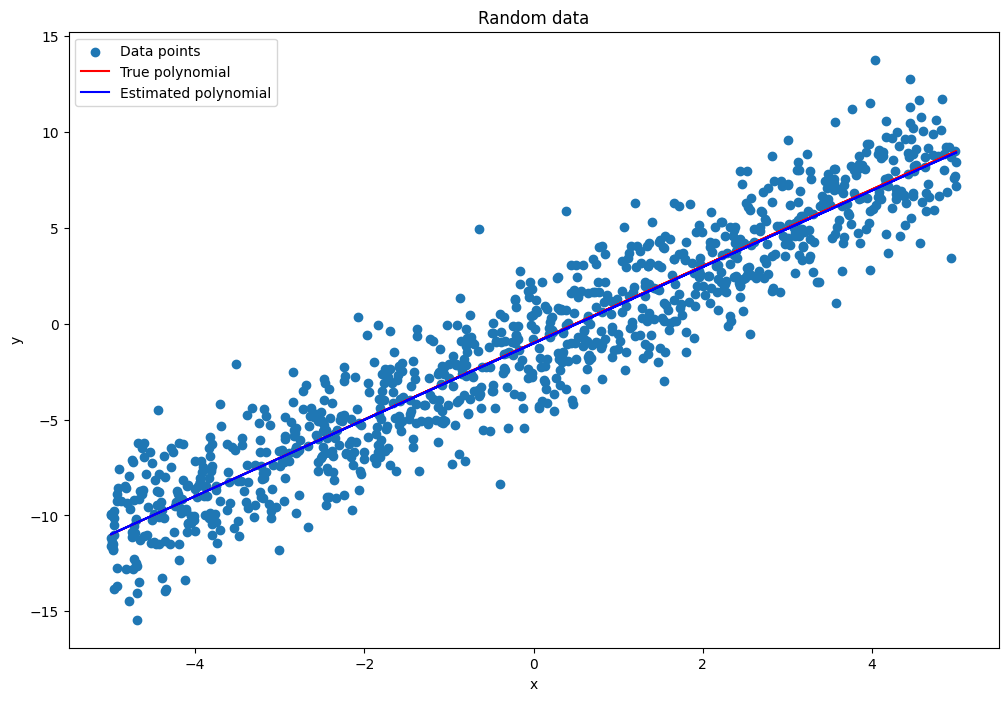

In [13]:
# Predictions over entire dataset
y_pred = np.dot(get_X_matrix(x_data), w_hat)

plt.figure(figsize=(12, 8))
plt.scatter(x_data, y_data, label="Data points")
plt.plot(x_data, y_perfect, color="red", label="True polynomial")
plt.plot(x_data, y_pred, color="blue", label="Estimated polynomial")
plt.legend()
plt.title("Random data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Using `statsmodels` library

In [14]:
import statsmodels.api as sm

# Perform hypothesis testing on the coefficients (t-statistic and p-value)
X_train_const = sm.add_constant(x_train)  # Add intercept to model
ols_model = sm.OLS(y_train, X_train_const).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     6460.
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:34:20   Log-Likelihood:                -1687.1
No. Observations:                 800   AIC:                             3378.
Df Residuals:                     798   BIC:                             3387.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0320      0.071    -14.615      0.0

In [15]:
# To make predictions on new data (e.g., X_test):
X_test_const = sm.add_constant(x_test)  # Add intercept to test data
y_pred = ols_model.predict(X_test_const)

# Calculate the Mean Squared Error and R^2 statistic
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"R2 statistic: {r2}")

Test MSE: 3.4724
R2 statistic: 0.9000081798803297


# Multivariate Linear Regression

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load data
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [17]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [18]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [19]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Add intercept to training and test data
X_train_const = sm.add_constant(X_train)

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3180.
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:34:23   Log-Likelihood:                -18067.
No. Observations:               16512   AIC:                         3.615e+04
Df Residuals:                   16503   BIC:                         3.622e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.6643      0.735    -49.900      0.0

In [20]:
# Make predictions on the test set
X_test_const = sm.add_constant(X_test)
y_pred = ols_model.predict(X_test_const)

# Calculate the Mean Squared Error and R^2 statistic
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"R2 statistic: {r2}")

Test MSE: 0.5327
R2 statistic: 0.6047072598918704
